ValueError: X has 2 features, but StandardScaler is expecting 30 features as input.

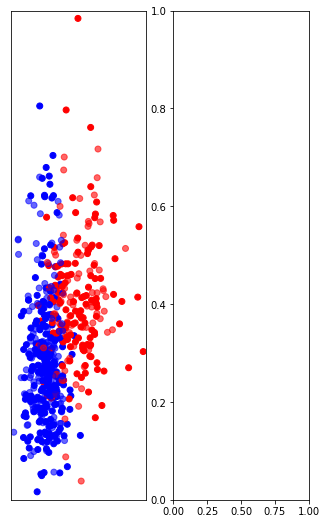

In [168]:
# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

brest = load_breast_cancer(return_X_y=True)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

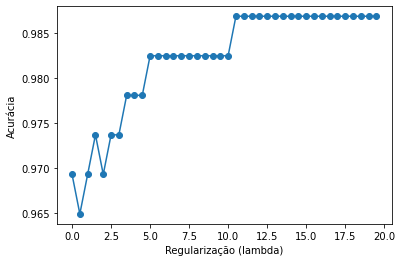

In [184]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

alphas = np.arange(0.001, 20, 0.5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

xc1 = iris.data[:49, ]
xc2 = iris.data[50:99, ]

y1 = iris.target[:49, ]
y2 = iris.target[50:99, ]

# Selecionando 30 valores para treinamento
xcTrain1 = xc1[:29, ]
xcTrain2 = xc2[:29, ]
yTrain1 = y1[:29, ]
yTrain2 = y2[:29, ]
xcTest1 = xc1[30:49, ]
xcTest2 = xc2[30:49, ]
yTest1 = y1[30:49, ]
yTest2 = y2[30:49, ]

# Treinamento
xcTrain = np.concatenate((xcTrain1, xcTrain2), axis=0)
yTrain = np.concatenate((yTrain1, yTrain2), axis=0)

# Teste
xcTest = np.concatenate((xcTest1, xcTest2), axis=0)
yTest = np.concatenate((yTest1, yTest2), axis=0)

xcTrain, xcTest, yTrain, yTest = train_test_split(X, y, test_size=0.3)

result = []
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

       # Plot the decision boundary. For that, we will assign a color to each
       # point in the mesh [x_min, x_max] x [y_min, y_max].
    # if hasattr(clf, "decision_function"):
    #     Z = clf.decision_function(
    #         np.column_stack([xx.ravel(), yy.ravel()]))
    # else:
    #     Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

    result = np.append(result, score)


plt.plot(alphas, result, 'o-')
plt.xlabel("Regularização (lambda)")
plt.ylabel("Acurácia")
plt.show()


# mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100, 100], alpha=1,
#                     max_iter=20000,
#                     early_stopping=True, shuffle=True, random_state=1)

# mlp.fit(xcTrain, yTrain)
# y_predict = mlp.predict(xcTest)
# accuracy_score(yTest, y_predict)


In [162]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def exercicio6(reglamb):
    X, y = load_breast_cancer(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=[100,100], alpha=reglamb,
                max_iter=20000,
                early_stopping=True, shuffle=True, random_state=1)
                
    mlp.fit(X_train, y_train)
    y_predict = mlp.predict(X_test)

    return accuracy_score(y_test, y_predict)


def AcuraciaMedia(reglamb):
    maxepocas = 3
    acuracia = []
    while(maxepocas > 0):
        acuracia = np.append(acuracia, exercicio6(reglamb))
        maxepocas -= 1
    return acuracia

print('Acurácia média com Lâmbida 1e-5: ',np.average(AcuraciaMedia(1e-5)), '+/-', np.std(AcuraciaMedia(1e-5)))
print('Acurácia média com Lâmbida 0.1: ',np.average(AcuraciaMedia(0.1)), '+/-', np.std(AcuraciaMedia(0.1)))
print('Acurácia média com Lâmbida 1: ',np.average(AcuraciaMedia(1)), '+/-', np.std(AcuraciaMedia(1)))
print('Acurácia média com Lâmbida 10: ',np.average(AcuraciaMedia(10)), '+/-', np.std(AcuraciaMedia(10)))
print('Acurácia média com Lâmbida 100: ',np.average(AcuraciaMedia(100)), '+/-', np.std(AcuraciaMedia(100)))



Acurácia média com Lâmbida 1e-5:  0.608187134502924 +/- 0.07504240372288556
Acurácia média com Lâmbida 0.1:  0.6374269005847953 +/- 0.11068280363803812
Acurácia média com Lâmbida 1:  0.7621832358674463 +/- 0.13583821746732433
Acurácia média com Lâmbida 10:  0.8596491228070176 +/- 0.20951312035156963
Acurácia média com Lâmbida 100:  0.7290448343079922 +/- 0.1354179682881747


In [156]:
import pandas as pd
# Treinamento de uma rede ELM
def trainELM(xin, yin, nNeurons, par, lambda_reg):
    xin = pd.DataFrame(xin)
    yin = pd.DataFrame(yin)
    
    nSamples = xin.shape[0]     # Numero de amostras.
    nDimension = xin.shape[1]     # Dimensao de entrada.

    # Adiciona ou não um termo de polarização ao vetor de treinamento w.
    if par == 1:
        xin.insert(nDimension, nDimension, 1)
        # Z<−replicate(p, runif((n+1),−0.5,0.5))
        Z = [np.random.uniform(low=-0.5, high=0.5, size=nDimension+1) for _ in range(nNeurons)]
    else:
        Z = [np.random.uniform(low=-0.5, high=0.5, size=nDimension) for _ in range(nNeurons)]
   
    Z = pd.DataFrame(Z)
    Z = Z.T

    H = np.tanh(xin @ Z)

    A = (H.T @ H) + lambda_reg * np.identity(H.shape[1])  # Matriz de Variância

    P = (np.identity(nSamples) - H @ (np.linalg.inv(A) @ H.T)) # Matriz de Projeção

    W = (np.linalg.inv(A) @ H.T) @ yin.T  # Calculo dos pesos

    return [W, H, Z, A , P]


# Saída de uma rede ELM
def YELM(xin, Z, W, par):

    xin = pd.DataFrame(xin)
    Z = pd.DataFrame(Z)
    W = pd.DataFrame(W)

    nDimension = xin.shape[1]  # Dimensao de entrada.

    # Adiciona ou não termo de polarização
    if(par == 1):
        xin.insert(nDimension, nDimension, 1)
        # np.c_[ xin, np.ones(xin.shape[0]) ] 

    # print("xin:", xin.shape)
    # print("Z:", Z.shape)
    H = np.tanh(xin @ Z)
    # print("H:", H.shape)
    # print("W:", W.shape)
    Yhat = np.sign(H @ W)
    
    return Yhat

ValueError: matrices are not aligned

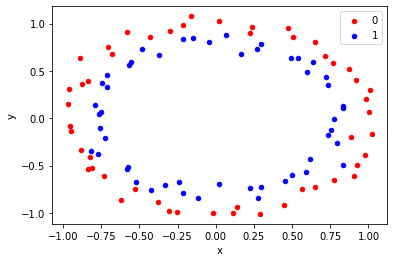

In [157]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plotContour(format, nNeurons):
    if(format == 1):
        X, y = make_circles(n_samples=100, noise=0.05)
    elif(format == 2):
        X, y = make_moons(n_samples=100, noise=0.05)
    # scatter plot, dots colored by class value

    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = hstack((r1,r2))

    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

    retlist = trainELM(X[:,:2], y, nNeurons, 1, 0.1)

    W = retlist[0]
    H = retlist[1]
    Z = retlist[2]

    #plotting contours
    # Make prediction from training process
    yhat = YELM(grid, Z, W, 1)
    yhat = (yhat > 0.5).astype(int)
    yhat = pd.DataFrame(yhat).to_numpy()

    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    pyplot.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = where(y == class_value)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    # show the plot
    if(nNeurons == 5):
        plt.title('Quantidade de Neuronios: 5')
    elif(nNeurons == 10):
        plt.title('Quantidade de Neuronios: 10')
    elif(nNeurons == 30):
        plt.title('Quantidade de Neuronios: 30')
    pyplot.show()

plotContour(1,5)
plotContour(1,10)
plotContour(1,30)
plotContour(2,5)
plotContour(2,10)
plotContour(2,30)